# Errors in Calibration

This notebook is meant to show the fit errors as an extra output

In [1]:
from __future__ import print_function

### Revision

In [2]:
import time
print(time.strftime("%d/%m/%Y"),' ',time.strftime("%H:%M:%S"))

07/11/2016   20:44:00


### Dependencies

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import tables
import pandas as pd
import time

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.mlab import griddata
matplotlib.style.use('ggplot')

In [6]:
pp = %env PYTHONPATH
print(pp)
#from Nh5 import *

/home/brais/Documents/root/lib


### DB  

In [7]:
icdat = './../../files/Kr/'
ifdat = 'in0.h5'
h5in =tables.open_file(icdat+ifdat,'a')

In [8]:
# the sipm raw data table (all events)
sipmrd = h5in.root.sipmrd
# number of events, sipms, and w.f.length
nevts,nsipms,nshapes = sipmrd.shape[0],sipmrd.shape[1],sipmrd.shape[2]
print('number of events {}, number of sipms {}, wf length {}'.format(nevts,nsipms,nshapes))

# DB position of the (ordered) SiPMs 
sipmdb = h5in.root.Sensors.DataSiPM
print('DB for a SIPM index {}, {}'.format(0,sipmdb[0]))
h5index_of_sensorid = {sipmdb[i][0] : i for i in range(nsipms) }
i0 = sipmdb[0][0]
print('h5index of sensor id [{}]={}'.format(i0,h5index_of_sensorid[i0]))

def sipm_position_of_sensorid(senid):
    if (not h5index_of_sensorid.has_key(senid)): return [-200.,-200,0.]
    h5index = h5index_of_sensorid[senid]
    pos = sipmdb[h5index][2]
    return pos

senid=1000
pos = sipm_position_of_sensorid(senid)
print('position of sensor id {} = {}'.format(senid,pos))

number of events 100, number of sipms 1789, wf length 800
DB for a SIPM index 0, (1000, 1, [-235.0, 45.0, -10000.0], 1.0, 15.5)
h5index of sensor id [1000]=0
position of sensor id 1000 = [  -235.     45. -10000.]


### SiPM calibration data

In [9]:
indir = './../../files/Calib/'
irun='2105'
infile = 'sipmCal_singlePulse_R'+irun

In [33]:
# input calibration data: dark current and led
import calib as sc
called = sc.CalData(indir+infile+'_led.txt')
caldark = sc.CalData(indir+infile+'_dark.txt')

loaded calibration data from file ./../../files/Calib/sipmCal_singlePulse_R2105_led.txt
number of sensors with data 1792
loaded calibration data from file ./../../files/Calib/sipmCal_singlePulse_R2105_dark.txt
number of sensors with data 1792


In [34]:
def position_of_indexes(indexes):
    senids = map(sc.sipm_sensorid_of_index,indexes)
    pos = map(sipm_position_of_sensorid,senids)
    return np.array(pos)

In [35]:
# take the reference values
xbins = called.xbins
indexes = called.indexes
positions = position_of_indexes(indexes)

# Calibration

### calibration to ngaussians

In [66]:
id = indexes[30]
chi2,pss, cov = sc.cal_fit_ngauss(called, [id, ], ngauss=7)
print('chi2: \n {} \npss: \n {} \ncov: \n {} '.format(chi2, pss, cov))

chi2: 
 [25.867812662452952] 
pss: 
 [array([  1.31030416e-01,   1.58488712e+01,   2.03818057e+00,
         1.85053551e+00,   2.27955462e+03,   5.50418731e+03,
         7.14654430e+03,   6.27587435e+03,   4.34346434e+03])] 
cov: 
 [[  3.71266556e-02  -1.54587502e-02   4.22463135e-03  -2.58581298e-03
    1.57324785e+00   1.30080328e+00  -1.47009508e+00  -2.69779141e+00
    1.04737225e+00]
 [ -1.54587502e-02   1.06129154e-02  -9.53517713e-04   8.50058726e-04
   -5.10498423e-01  -9.53024731e-02   1.18439434e+00   1.71864736e+00
   -2.09591617e+00]
 [  4.22463135e-03  -9.53517713e-04   3.09532234e-02  -1.61890483e-02
    5.52274472e+00   7.68417753e-01   3.63780106e-01  -7.22344667e-01
   -3.01258016e+00]
 [ -2.58581298e-03   8.50058726e-04  -1.61890483e-02   1.58887492e-02
   -2.91130513e+00  -6.65844947e-01  -2.23720908e-01   8.45478467e-01
    3.59158838e+00]
 [  1.57324785e+00  -5.10498423e-01   5.52274472e+00  -2.91130513e+00
    6.76376108e+04   1.44314682e+02   3.15545763e+01  -1.87

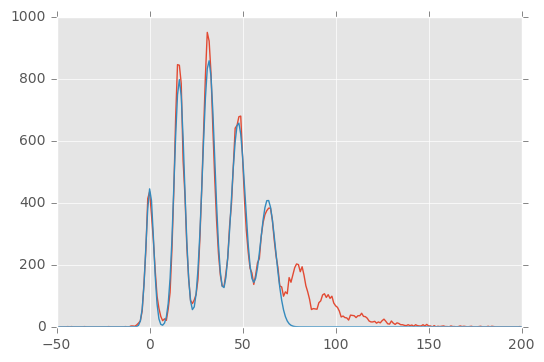

In [67]:
xs, ys = called.xbins, called.values[id]

#fig, axes = plt.subplots(2,1)
plt.plot(xs,ys)

ps = pss[0]
ffun = sc.ffun_ngauss
fys =ffun(ps,xs)
plt.plot(xs,fys)

In [58]:
# Parameters and errors:
for i, p, var in zip(range(len(ps)),ps,np.diag(cov)):
    print("p_"+str(i)+" = ", p, " +- " , var**0.5 )

p_0 =  0.0455758273194  +-  0.0478968661757
p_1 =  15.8141619494  +-  0.054477870936
p_2 =  1.60953169562  +-  0.0399496816264
p_3 =  1.65857940449  +-  0.0665443262668
p_4 =  11260.418941  +-  343.955986177
p_5 =  9994.85196449  +-  326.118713558
p_6 =  4837.34583265  +-  231.325071185
p_7 =  1761.40076421  +-  145.307316037
p_8 =  545.320348538  +-  86.9124968625


### calibration to poisson and ngaussians

In [68]:
id = indexes[30]
chi2,pss, cov = sc.cal_fit_poissongauss(called,[id],ngauss=7)
print('chi2: \n {} \npss: \n {} \ncov: \n {} '.format(chi2, pss, cov))




chi2: 
 [4.5150764542344177] 
pss: 
 [array([  2.94035350e+04,   1.30513847e-01,   1.58332431e+01,
         2.65653859e+00,   2.05130427e+00,   1.79587660e+00])] 
cov: 
 [[  1.51796241e+05  -1.45268341e-01   5.13311758e-02   7.99430666e-01
    3.45440971e-01   2.12250198e-01]
 [ -1.45268341e-01   6.77065393e-03  -2.64971229e-03  -2.32362511e-05
    7.42363625e-04  -4.33714903e-04]
 [  5.13311758e-02  -2.64971229e-03   1.65721262e-03  -2.83714455e-05
   -1.39296606e-04   1.22982002e-04]
 [  7.99430666e-01  -2.32362511e-05  -2.83714455e-05   6.07901189e-04
   -1.42237169e-04   8.55833630e-05]
 [  3.45440971e-01   7.42363625e-04  -1.39296606e-04  -1.42237169e-04
    5.75847711e-03  -2.83686088e-03]
 [  2.12250198e-01  -4.33714903e-04   1.22982002e-04   8.55833630e-05
   -2.83686088e-03   2.48639281e-03]] 


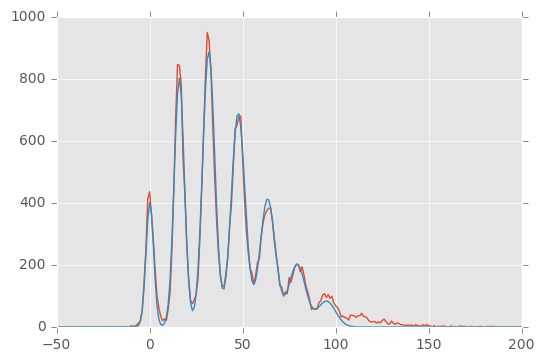

In [69]:
xs, ys = called.xbins, called.values[id]

#fig, axes = plt.subplots(2,1)
plt.plot(xs,ys)

ps = pss[0]
ffun = sc.ffun_poissongauss
fys =ffun(ps,xs)
plt.plot(xs,fys)

In [64]:
# Parameters and errors:
for i, p, var in zip(range(len(ps)),ps,np.diag(cov)):
    print("p_"+str(i)+" = ", p, " +- " , var**0.5 )

p_0 =  28373.4544414  +-  551.692948202
p_1 =  0.0445987823948  +-  0.0494804293759
p_2 =  15.8177155215  +-  0.0555850778911
p_3 =  0.961417254134  +-  0.0205570517429
p_4 =  1.60878364884  +-  0.0412972185599
p_5 =  1.64683391875  +-  0.0664774239493
